# Beneficiários

In [1]:
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from io import BytesIO
from datetime import datetime
from collections import defaultdict

In [2]:
cadastro = pd.read_csv("https://dadosabertos.ans.gov.br/FTP/PDA/caracteristicas_produtos_saude_suplementar/caracteristicas_produtos_saude_suplementar.csv", sep=";", encoding="ISO-8859-1")

In [3]:
cadastro

,ID_PLANO,CD_PLANO,NM_PLANO,CD_OPERADORA,RAZAO_SOCIAL,GR_MODALIDADE,PORTE_OPERADORA,VIGENCIA_PLANO,CONTRATACAO,GR_CONTRATACAO,...,COBERTURA,TIPO_FINANCIAMENTO,ABRANGENCIA_COBERTURA,FATOR_MODERADOR,ACOMODACAO_HOSPITALAR,LIVRE_ESCOLHA,SITUACAO_PLANO,DT_SITUACAO,DT_REGISTRO_PLANO,DT_ATUALIZACAO
0,18611498,489090216,NOSSO PLANO AHO CE GM ENF CC AD PMD 006,368253,Hapvida Assistencia Medica S.A.,Medicina De Grupo,Grande,P,Coletivo empresarial,Coletivo empresarial,...,MÃ©dico-hospitalar,Preestabelecido,Grupo de municÃ­pios,CoparticipacÃ£o,Coletiva,Ausente,Ativo,2023-03-28,2021-06-11,2023-12-11
1,18611519,489097213,NOSSO PLANO AHO CE GM ENF CC CORP PMD 002,368253,Hapvida Assistencia Medica S.A.,Medicina De Grupo,Grande,P,Coletivo empresarial,Coletivo empresarial,...,MÃ©dico-hospitalar,Preestabelecido,Grupo de municÃ­pios,CoparticipacÃ£o,Coletiva,Ausente,Ativo,2023-03-28,2021-06-11,2023-12-11
2,18612422,491317225,PJR MGRI-I AHO CE GM ENF PMDSS 032,368253,Hapvida Assistencia Medica S.A.,Medicina De Grupo,Grande,P,Coletivo empresarial,Coletivo empresarial,...,MÃ©dico-hospitalar,Preestabelecido,Grupo de municÃ­pios,Ausente,Coletiva,Ausente,Ativo,2023-03-28,2022-01-24,2023-12-11
3,18611564,489176217,MIX AHO CE GM APT CC CORP AD PMD 026,368253,Hapvida Assistencia Medica S.A.,Medicina De Grupo,Grande,P,Coletivo empresarial,Coletivo empresarial,...,MÃ©dico-hospitalar,Preestabelecido,Grupo de municÃ­pios,CoparticipacÃ£o,Individual,Ausente,Ativo,2023-03-28,2021-06-29,2023-12-11
4,18611615,489759215,PLENO AHO CE GM ENF CORP PMD 041,368253,Hapvida Assistencia Medica S.A.,Medicina De Grupo,Grande,P,Coletivo empresarial,Coletivo empresarial,...,MÃ©dico-hospitalar,Preestabelecido,Grupo de municÃ­pios,Ausente,Coletiva,Ausente,Ativo,2023-03-28,2021-09-10,2023-12-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150570,1420372,701864999,UNIMED AMBUL.HOSPIT.OBSTET.ENFERM.LOCAL.CO-PAR...,359033,Unimed TrÃªs CoraÃ§Ãµes Cooperativa De Trabalh...,Cooperativa MÃ©dica,Pequeno,P,Individual ou familiar,Individual ou Familiar,...,MÃ©dico-hospitalar,Preestabelecido,Grupo de municÃ­pios,CoparticipacÃ£o,Coletiva,Parcial sem internaÃ§Ã£o,Suspenso,2008-03-20,1999-03-31,2023-12-11
150571,1420387,701870993,UNIMED AMBUL.HOSPIT.OBSTET.ENFERM.LOCAL,359033,Unimed TrÃªs CoraÃ§Ãµes Cooperativa De Trabalh...,Cooperativa MÃ©dica,Pequeno,P,Coletivo empresarial,Coletivo empresarial,...,MÃ©dico-hospitalar,NÃ£o Informado,Grupo de municÃ­pios,Ausente,NÃ£o Informado,Ausente,Cancelado,2000-08-22,1999-03-31,2023-12-11
150572,1420409,701878999,UNIMED AMBUL.HOSPIT.OBSTET.ENFERM.REGIONAL,359033,Unimed TrÃªs CoraÃ§Ãµes Cooperativa De Trabalh...,Cooperativa MÃ©dica,Pequeno,P,Coletivo empresarial,Coletivo empresarial,...,MÃ©dico-hospitalar,NÃ£o Informado,Grupo de municÃ­pios,Ausente,NÃ£o Informado,Ausente,Cancelado,2000-08-22,1999-03-31,2023-12-11
150573,1420545,418888998,UNIMED ADESAO 2 - LOCAL,359033,Unimed TrÃªs CoraÃ§Ãµes Cooperativa De Trabalh...,Cooperativa MÃ©dica,Pequeno,P,Coletivo por adesÃ£o,Coletivo por adesÃ£o,...,MÃ©dico-hospitalar,NÃ£o Informado,Grupo de municÃ­pios,Ausente,NÃ£o Informado,Ausente,Cancelado,2000-08-22,1999-08-23,2023-12-11


### Códigos ANS (RI Hapvida)

In [6]:
# donwload dos códigos ANS de Hapvida e GNDI

RI_URL = 'https://api.mziq.com/mzfilemanager/v2/d/6bbd1770-f9f4-44e8-a1b1-d26b7585eec1/6d20a378-c816-6a0a-ad88-d557761215bd?origin=1'

def ans_codes(url, empresa):
    response = requests.get(url)
    content = response.content

    if empresa == 'HAPVIDA':
        df = pd.read_excel(BytesIO(content), sheet_name='Códigos ANS_ANS Code', skiprows=1, nrows=28, usecols=[0,1,2,3,4])
        df.columns = ['CD_ANS', 'EMPRESA', 'GRUPO', 'ASSINATURA', 'FECHAMENTO']

    elif empresa == 'GNDI':
        df = pd.read_excel(BytesIO(content), sheet_name='Códigos ANS_ANS Code', skiprows=1, nrows=33, usecols=[6, 7, 8, 9])
        df.columns = ['CD_ANS', 'EMPRESA', 'ASSINATURA', 'FECHAMENTO']

    else:
        raise ValueError("Invalid empresa value. Must be 'HAPVIDA' or 'GNDI'.")

    return df

In [7]:
# download hapvida ANS codes

hapvida = ans_codes(RI_URL, 'HAPVIDA')
hapvida_codes = hapvida['CD_ANS'].astype('int32')

hapvida_codes.shape


(28,)

In [8]:
intermedica = ans_codes(RI_URL, 'GNDI')

intermedica_codes = intermedica['CD_ANS'].dropna()
intermedica_codes = intermedica_codes.iloc[:-1].tolist() + intermedica_codes.iloc[-1].split('/')
intermedica_codes = pd.Series(intermedica_codes).astype('int32')

# fix intermedica codes

intermedica_codes.loc[intermedica_codes == 33925] = 339245
intermedica_codes.loc[intermedica_codes == 34527] = 345270
intermedica_codes.loc[intermedica_codes == 32468] = 324698
intermedica_codes.loc[intermedica_codes == 30912] = 309192
intermedica_codes.loc[intermedica_codes == 32507] = 325074
intermedica_codes.loc[intermedica_codes == 35901] = 359017

intermedica_codes.shape


(20,)

In [9]:
# combine all closings codes

combined_codes = pd.concat([hapvida_codes, intermedica_codes], ignore_index=True)

# combined_codes = pd.concat([combined_codes, pd.Series([335614])], ignore_index=True)


In [10]:
combined_codes.unique()

array([368253, 415847, 351091, 302091, 323811, 309338, 339539, 333328,
       365319, 405604, 411124, 417181, 413127, 416614, 415812, 401196,
       410632, 414450, 414131, 360767, 413275, 402851, 373141, 410047,
       348805, 346471, 417823, 350249, 359017, 339245, 345270, 324698,
       309192, 325074, 368849, 351563, 349755, 344362, 340782, 414298,
       349194, 309699, 343013, 402966, 348520, 306649, 354554, 361852],
      dtype=int32)

In [11]:
bradesco = [5711]
sulamerica = [6246, 477, 350141]
amil = [326305, 326500]
cassi = [346659]
unimed = [339679, 343889, 393321, 701, 352501] 

In [12]:
ans_codes = {'Bradesco': bradesco, 'SulAmérica': sulamerica, 'Amil': amil, 'Cassi': cassi, 'Unimed': unimed, 'Hapvida': hapvida_codes, 'Intermédica': intermedica_codes}

df_codes = pd.DataFrame(list(ans_codes.items()), columns=['OPERADORA', 'CD_ANS'])

df_codes = df_codes.explode('CD_ANS').reset_index(drop=True)

df_codes.head(10)

,OPERADORA,CD_ANS
0,Bradesco,5711
1,SulAmérica,6246
2,SulAmérica,477
3,SulAmérica,350141
4,Amil,326305
5,Amil,326500
6,Cassi,346659
7,Unimed,339679
8,Unimed,343889
9,Unimed,393321


In [13]:
df_codes.to_csv('data/dados_agregados/codigo_ans.csv', index=False)

### Beneficiários

In [14]:
df_list = []

types = defaultdict(lambda: 'int32', {'SG_UF': 'category', 'DE_FAIXA_ETARIA': 'category'})

for file in os.listdir('data/beneficiarios'):
    temp_df = pd.read_csv(f'data/beneficiarios/{file}', usecols=['CD_OPERADORA', 'DE_FAIXA_ETARIA', 'SG_UF', 'COBERTURA_ASSIST_PLAN', 'QT_BENEFICIARIO_ATIVO'], dtype=types)
    
    temp_df = temp_df.loc[temp_df['COBERTURA_ASSIST_PLAN'] == 1, :].copy()
    temp_df['ID'] = str(file)[:-4]
    
    grouped_data = temp_df.groupby(['ID', 'CD_OPERADORA', 'DE_FAIXA_ETARIA', 'SG_UF'], observed=False)['QT_BENEFICIARIO_ATIVO'].sum().reset_index()

    del temp_df

    df_list.append(grouped_data)

benef = pd.concat(df_list, ignore_index=True)

benef.info()

,ID,CD_OPERADORA,DE_FAIXA_ETARIA,SG_UF,QT_BENEFICIARIO_ATIVO
0,201803,27,00 a 05 anos,AC,0
1,201803,27,00 a 05 anos,AL,0
2,201803,27,00 a 05 anos,AM,0
3,201803,27,00 a 05 anos,AP,0
4,201803,27,00 a 05 anos,BA,0


In [40]:
benef_operadoras = benef.merge(df_codes, how='left', left_on='CD_OPERADORA', right_on='CD_ANS')

benef202309 = benef_operadoras.loc[benef_operadoras['ID'] == "202309"]

benef202309.loc[benef202309['OPERADORA'].isna() | (benef202309['OPERADORA'] == 'Cassi'), 'OPERADORA'] = 'Outros'
benef202309.loc[benef202309['OPERADORA'].isin(['Hapvida', 'Intermédica']), 'OPERADORA'] = 'Hapvida'

grouped_data = benef202309.groupby('OPERADORA')['QT_BENEFICIARIO_ATIVO'].sum()

grouped_data.sort_values(ascending=False)


OPERADORA
Outros        28114080
Hapvida        8683729
Unimed         5566077
Bradesco       3316015
Amil           2859735
SulAmérica     2298120
Name: QT_BENEFICIARIO_ATIVO, dtype: int32

In [41]:
benef_operadoras.loc[benef_operadoras['OPERADORA'].isin(['Hapvida', 'Intermédica']), 'OPERADORA'] = 'Hapvida'
benef_operadoras.loc[benef_operadoras['OPERADORA'].isna() | (benef_operadoras['OPERADORA'] != 'Hapvida'), 'OPERADORA'] = 'Outros'

grouped_benef = benef_operadoras.groupby(['OPERADORA', 'ID'])['QT_BENEFICIARIO_ATIVO'].sum().reset_index()

grouped_benef

,OPERADORA,ID,QT_BENEFICIARIO_ATIVO
0,Hapvida,201803,7323353
1,Hapvida,201806,7486719
2,Hapvida,201809,7540897
3,Hapvida,201812,7626491
4,Hapvida,201903,7652782
5,Hapvida,201906,7854082
6,Hapvida,201909,8015326
7,Hapvida,201912,8211713
8,Hapvida,202003,8276870
9,Hapvida,202006,8211479


In [42]:
def parse_dates(str_date: str):
    try:
        return pd.to_datetime(str_date, format='%Y%m')
    except ValueError:
        return pd.NaT

grouped_benef['ID'] = grouped_benef['ID'].astype(str)
grouped_benef['DATA'] = grouped_benef['ID'].apply(parse_dates)
grouped_benef["ANO"] = grouped_benef["DATA"].dt.year
grouped_benef['QUARTER'] = grouped_benef['DATA'].apply(lambda x: str(x.quarter) + "T" + str(x.year)[2:4])

grouped_benef

# grouped_benef.to_csv('data/dados_agregados/grouped_qtbeneficiarios.csv', index=False)

### Market Share

In [41]:
# market share 9M23

percentage_data = grouped_data / grouped_data.sum() * 100

percentage_data.sort_values(ascending=False).round(1)

OPERADORA
Outros        55.3
Hapvida       17.1
Unimed        10.9
Bradesco       6.5
Amil           5.6
SulAmérica     4.5
Name: QT_BENEFICIARIO_ATIVO, dtype: float64

In [42]:
dict = {}

for file in os.listdir('data/beneficiarios'):
    temp_df = pd.read_csv(f'data/beneficiarios/{file}', usecols=['CD_OPERADORA', 'COBERTURA_ASSIST_PLAN', 'QT_BENEFICIARIO_ATIVO'], dtype='int32')
    
    temp_df = temp_df.loc[temp_df['COBERTURA_ASSIST_PLAN'] == 1, :].copy()
    temp_df['OPERADORA'] = np.where(temp_df['CD_OPERADORA'].isin(combined_codes), 1, 0)
    
    grouped_data = temp_df.groupby('OPERADORA')['QT_BENEFICIARIO_ATIVO'].sum()
    percentage_data = grouped_data / grouped_data.sum() * 100

    del temp_df

    dict[str(file)[:-4]] = percentage_data[1]

dict

{'201803': 15.622484174384258,
 '202306': 17.26259849598291,
 '202003': 17.61723354771554,
 '201809': 16.04176088396011,
 '202112': 17.88585280408949,
 '202209': 17.80372745283268,
 '202109': 17.784427369353338,
 '201906': 16.736734406545867,
 '202203': 17.692271902593863,
 '201909': 17.07859456234552,
 '202009': 18.020341269938246,
 '202303': 17.549890750820754,
 '201912': 17.479078438083757,
 '201903': 16.344321117799737,
 '202103': 18.054692874634164,
 '201806': 15.933584657980655,
 '202106': 18.00398602497562,
 '202309': 17.08125944819437,
 '201812': 16.213839072764177,
 '202212': 17.613229324007435,
 '202206': 17.852702716482803,
 '202006': 17.631785074056154,
 '202012': 18.0881973050589}

In [56]:
mkt_share = pd.DataFrame(dict.items(), columns=['ID', 'MKT_SHARE'])

mkt_share['ID'] = mkt_share['ID'].apply(lambda x: datetime.strptime(x, "%Y%m"))
mkt_share = mkt_share.sort_values(by='ID').reset_index(drop=True)

mkt_share['QUARTER'] = mkt_share['ID'].apply(lambda x: str(x.quarter) + "T" + str(x.year)[2:4])

mkt_share.tail(10)

# mkt_share.to_csv('data/dados_agregados/mkkshare_time.csv', index=False)

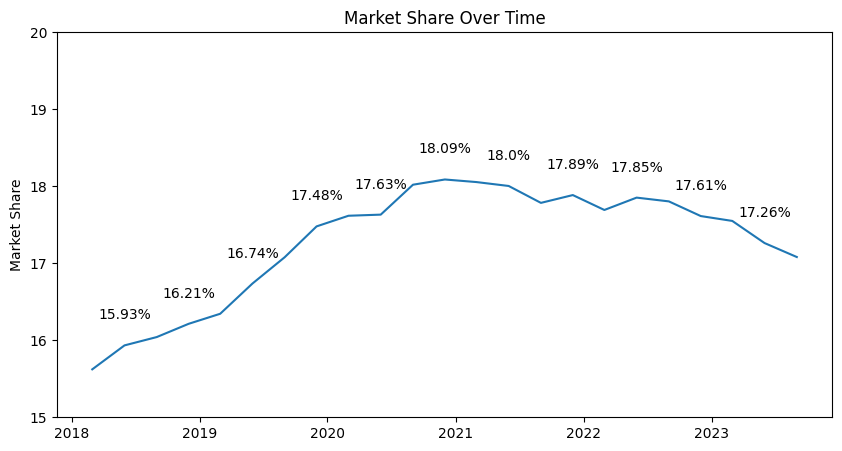

In [55]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=mkt_share, x='ID', y='MKT_SHARE')

for x, y in zip(mkt_share['ID'], mkt_share['MKT_SHARE']):
    plt.text(x, y+0.3, str(round(y, 2)) + '%' if x.month % 6 == 0 else '', ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('Market Share')
plt.ylim(15, 20)
plt.title('Market Share Over Time')
plt.show()


In [57]:
# número de beneficiários ativos e taxa de cobertura 9M2023

ben2023 = pd.read_csv('data/beneficiarios/202309.csv', usecols=['CD_OPERADORA', 'COBERTURA_ASSIST_PLAN', 'QT_BENEFICIARIO_ATIVO'], dtype='int32')

beneficiarios_ativos = ben2023.loc[ben2023['COBERTURA_ASSIST_PLAN'] == 1, :]['QT_BENEFICIARIO_ATIVO'].sum()

print(f"Número de beneficiários ativos: {beneficiarios_ativos/1000000:.1f} milhões")
print(f"Taxa de Cobertura: {beneficiarios_ativos / 203062512:.2%}")


Número de beneficiários ativos: 50.8 milhões
Taxa de Cobertura: 25.04%


### Número de Operadoras

In [80]:
operadoras = benef.groupby(['ID', 'CD_OPERADORA'])['QT_BENEFICIARIO_ATIVO'].sum().reset_index()

operadoras_ativas = operadoras.loc[operadoras['QT_BENEFICIARIO_ATIVO'] > 0, :]
unique_operadoras = operadoras_ativas.groupby('ID')['CD_OPERADORA'].nunique().reset_index()

unique_operadoras = unique_operadoras.rename(columns={'CD_OPERADORA': 'N_OPERADORAS_ATIVAS'})

unique_operadoras['ID'] = unique_operadoras['ID'].apply(lambda x: datetime.strptime(x, "%Y%m"))
unique_operadoras = unique_operadoras.sort_values(by='ID').reset_index(drop=True)

unique_operadoras['QUARTER'] = unique_operadoras['ID'].apply(lambda x: str(x.quarter) + "T" + str(x.year)[2:4])

unique_operadoras.tail(10)

# unique_operadoras.to_csv('data/dados_agregados/operadoras_ativas.csv', index=True)


,ID,N_OPERADORAS_ATIVAS,QUARTER
13,2021-06-01,704,2T21
14,2021-09-01,704,3T21
15,2021-12-01,698,4T21
16,2022-03-01,700,1T22
17,2022-06-01,695,2T22
18,2022-09-01,691,3T22
19,2022-12-01,685,4T22
20,2023-03-01,681,1T23
21,2023-06-01,676,2T23
22,2023-09-01,676,3T23


### Market Share (Operadoras)

In [88]:
dict = {}

for file in os.listdir('data/beneficiarios'):
    temp_df = pd.read_csv(f'data/beneficiarios/{file}', usecols=['CD_OPERADORA', 'COBERTURA_ASSIST_PLAN', 'QT_BENEFICIARIO_ATIVO'], dtype='int32')
    
    temp_df = temp_df.loc[temp_df['COBERTURA_ASSIST_PLAN'] == 1, :].copy()
    temp_df['OPERADORA'] = np.where(temp_df['CD_OPERADORA'].isin(combined_codes), 'Hapvida', 
                            np.where(temp_df['CD_OPERADORA'].isin(bradesco), 'Bradesco',
                            np.where(temp_df['CD_OPERADORA'].isin(sulamerica), 'SulAmérica',
                            np.where(temp_df['CD_OPERADORA'].isin(amil), 'Amil',
                            np.where(temp_df['CD_OPERADORA'].isin(cassi), 'Cassi',
                            np.where(temp_df['CD_OPERADORA'].isin(unimed), 'Unimed', 'Outros'))))))

    temp_df['OPERADORA'] = temp_df['OPERADORA'].astype('category')
    
    grouped_data = temp_df.groupby('OPERADORA', observed=False)['QT_BENEFICIARIO_ATIVO'].sum()
    percentage_data = grouped_data / grouped_data.sum() * 100

    del temp_df

    dict[str(file)[:-4]] = percentage_data.to_dict()

dict

{'201803': {'Amil': 7.872375469705223,
  'Bradesco': 7.07529386421791,
  'Cassi': 1.479573983893639,
  'Hapvida': 15.622484174384258,
  'Outros': 54.269497197208004,
  'SulAmérica': 4.135972247545582,
  'Unimed': 9.544803063045386},
 '202306': {'Amil': 5.510909561835435,
  'Bradesco': 6.624936103353141,
  'Cassi': 1.1702295965438574,
  'Hapvida': 17.26259849598291,
  'Outros': 53.76803048235909,
  'SulAmérica': 4.665944927157376,
  'Unimed': 10.997350832768191},
 '202003': {'Amil': 6.634681566322455,
  'Bradesco': 7.047033899414425,
  'Cassi': 1.3848827458591455,
  'Hapvida': 17.61723354771554,
  'Outros': 52.63603779746683,
  'SulAmérica': 4.306279723961263,
  'Unimed': 10.373850719260345},
 '201809': {'Amil': 7.657110835786307,
  'Bradesco': 6.978080477642136,
  'Cassi': 1.4648661386009627,
  'Hapvida': 16.04176088396011,
  'Outros': 53.90875999961964,
  'SulAmérica': 4.157280924171213,
  'Unimed': 9.792140740219631},
 '202112': {'Amil': 6.1676258223138065,
  'Bradesco': 6.6740827900

In [98]:
share_operadoras = pd.DataFrame([(key, *key_pair) for key, value in dict.items() for key_pair in value.items()], columns=['ID', 'OPERADORA', 'MKT_SHARE'])

share_operadoras = share_operadoras.loc[share_operadoras['OPERADORA'] != 'Outros', :].copy()
share_operadoras['ID'] = share_operadoras['ID'].apply(lambda x: datetime.strptime(x, "%Y%m"))
share_operadoras = share_operadoras.sort_values(by='ID').reset_index(drop=True)

share_operadoras['QUARTER'] = share_operadoras['ID'].apply(lambda x: str(x.quarter) + "T" + str(x.year)[2:4])

share_operadoras

,ID,OPERADORA,MKT_SHARE,QUARTER
0,2018-03-01,Amil,7.872375,1T18
1,2018-03-01,Bradesco,7.075294,1T18
2,2018-03-01,Cassi,1.479574,1T18
3,2018-03-01,Hapvida,15.622484,1T18
4,2018-03-01,SulAmérica,4.135972,1T18
...,...,...,...,...
133,2023-09-01,Hapvida,17.081259,3T23
134,2023-09-01,Bradesco,6.522741,3T23
135,2023-09-01,Amil,5.625219,3T23
136,2023-09-01,Unimed,10.948707,3T23


In [102]:


share_operadoras = share_operadoras.loc[share_operadoras['OPERADORA'] != 'Cassi', :].copy()

share_operadoras['PCT_CHANGE'] = share_operadoras.groupby('OPERADORA')['MKT_SHARE'].pct_change()

# share_operadoras.to_csv('data/dados_agregados/mkkshare_operadoras.csv', index=False)

share_operadoras


,ID,OPERADORA,MKT_SHARE,QUARTER,PCT_CHANGE
0,2018-03-01,Amil,7.872375,1T18,NaN
1,2018-03-01,Bradesco,7.075294,1T18,NaN
3,2018-03-01,Hapvida,15.622484,1T18,NaN
4,2018-03-01,SulAmérica,4.135972,1T18,NaN
5,2018-03-01,Unimed,9.544803,1T18,NaN
...,...,...,...,...,...
132,2023-09-01,SulAmérica,4.520499,3T23,-0.031172
133,2023-09-01,Hapvida,17.081259,3T23,-0.010505
134,2023-09-01,Bradesco,6.522741,3T23,-0.015426
135,2023-09-01,Amil,5.625219,3T23,0.020742


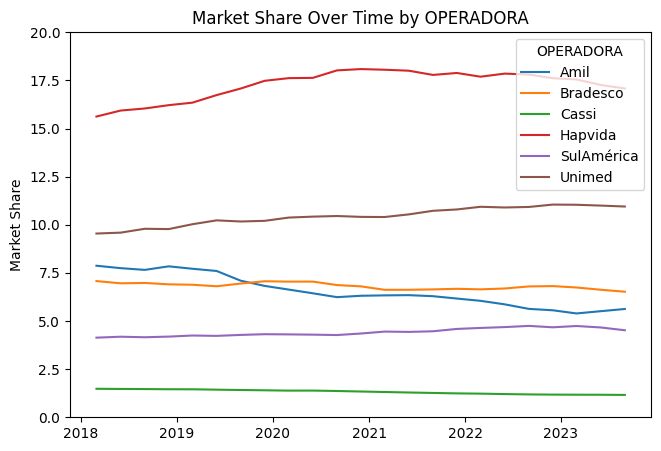

In [90]:
plt.figure(figsize=(7.5, 5))

sns.lineplot(data=share_operadoras, x='ID', y='MKT_SHARE', hue='OPERADORA')

plt.xlabel('')
plt.ylabel('Market Share')
plt.ylim(0, 20)
plt.title('Market Share Over Time by OPERADORA')
plt.legend(title='OPERADORA')
plt.show()
